In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_x = pd.read_csv("../data/processed/labeled_dataset.csv")

In [6]:
train_x.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


In [7]:
train_x.columns

Index(['ethereum_address', 'ether_balance', 'unique_tokens',
       'unique_transfers', 'mined_blocks', 'outgoing_txns', 'incoming_txns',
       'total_eth_sent', 'avg_eth_sent', 'total_usd_sent', 'avg_usd_sent',
       'total_eth_recd', 'avg_eth_recd', 'total_usd_recd', 'avg_usd_recd',
       'active_months', 'monthly_outgoing_txns', 'monthly_incoming_txns',
       'monthly_eth_sent', 'monthly_usd_sent', 'monthly_eth_recd',
       'monthly_usd_recd', 'contracts_created', 'contract_txns_sent',
       'incoming_avg_time_btwn_txns', 'incoming_std_time_btwn_txns',
       'outgoing_avg_time_btwn_txns', 'outgoing_std_time_btwn_txns',
       'num_tokens_used', 'Entity'],
      dtype='object')

In [9]:
train_x.describe()

,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,...,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used
count,6.057000e+03,6057.000000,6057.000000,6.057000e+03,6.057000e+03,6.057000e+03,6.057000e+03,6057.000000,6.057000e+03,6.057000e+03,...,6.057000e+03,6.057000e+03,6.057000e+03,6057.000000,6.057000e+03,6.057000e+03,6.057000e+03,6.057000e+03,6.057000e+03,6057.000000
mean,1.814567e+03,33.472511,725.773320,1.144588e+03,8.534857e+03,1.992621e+03,4.699895e+04,206.815801,1.692018e+07,7.107657e+04,...,1.013701e+06,1.914648e+03,8.908021e+05,21.641572,5.917667e+02,1.990698e+06,3.296525e+06,2.702445e+06,3.935130e+06,20.440977
std,2.296072e+04,41.619208,14174.009791,3.980415e+04,2.655837e+05,6.728180e+04,9.761575e+05,1882.565290,3.913047e+08,5.492802e+05,...,2.468277e+07,4.326486e+04,2.472455e+07,1501.427989,2.158180e+04,2.643054e+06,3.963315e+06,3.142987e+06,4.326479e+06,23.188530
min,1.000000e+02,1.000000,1.000000,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,2.106900e-04,1.953840e-02,0.000000,0.000000e+00,8.285714e+00,2.121320e+00,3.571429e+00,2.121320e+00,1.000000
25%,1.451077e+02,16.000000,1.000000,0.000000e+00,5.000000e+00,7.000000e+00,6.200000e+01,6.700000,2.442860e+04,2.602808e+03,...,1.425891e+03,1.677984e+01,3.394004e+03,0.000000,0.000000e+00,3.577614e+05,6.699653e+05,7.072936e+05,1.118933e+06,11.000000
50%,2.499944e+02,24.000000,2.000000,0.000000e+00,9.000000e+00,1.300000e+01,2.692496e+02,24.250000,1.059119e+05,9.377371e+03,...,6.102098e+03,4.016000e+01,9.604682e+03,0.000000,0.000000e+00,1.183355e+06,2.163478e+06,1.726646e+06,2.666490e+06,16.000000
75%,5.809903e+02,42.000000,5.000000,0.000000e+00,1.800000e+01,2.800000e+01,1.116000e+03,84.495463,4.330781e+05,3.218377e+04,...,2.458007e+04,1.188325e+02,3.123965e+04,0.000000,0.000000e+00,2.591235e+06,4.470328e+06,3.508184e+06,5.196597e+06,24.000000
max,1.525759e+06,951.000000,472190.000000,2.385967e+06,1.567863e+07,4.642263e+06,4.261809e+07,103465.362909,2.047549e+10,2.222456e+07,...,1.279718e+09,2.150257e+06,1.294688e+09,116100.000000,1.326134e+06,3.326502e+07,4.704359e+07,2.963517e+07,4.190998e+07,519.000000


In [14]:
# Remove address and Label (strings) from analysis
data = train_x.iloc[:, 1:-1]

In [15]:
data = data.apply(pd.to_numeric)

ether_balance


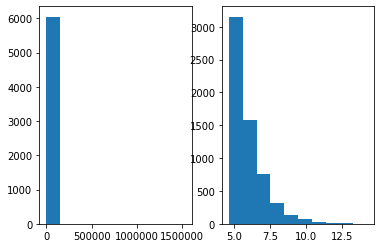

unique_tokens


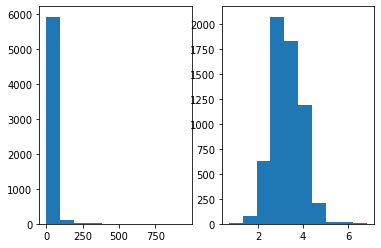

unique_transfers


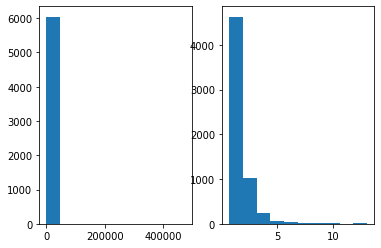

mined_blocks


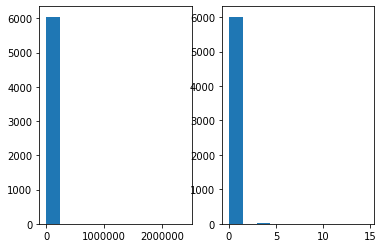

outgoing_txns


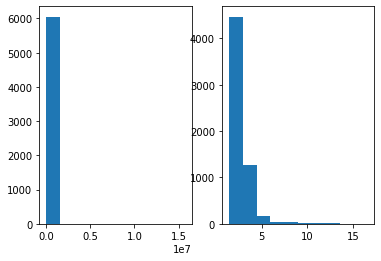

incoming_txns


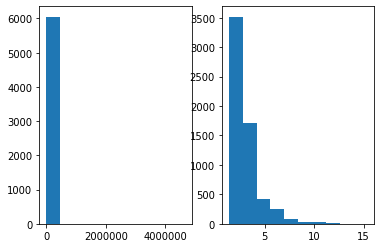

total_eth_sent


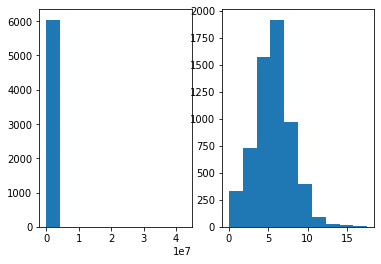

avg_eth_sent


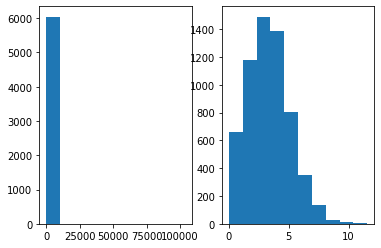

total_usd_sent


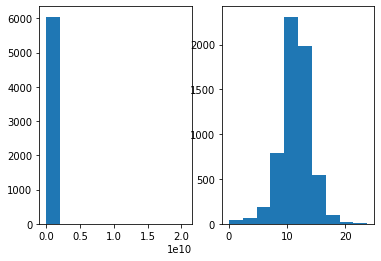

avg_usd_sent


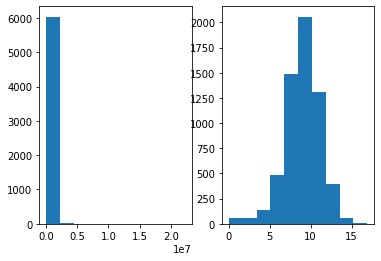

total_eth_recd


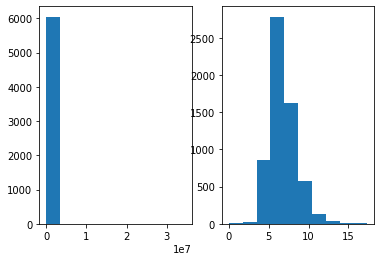

avg_eth_recd


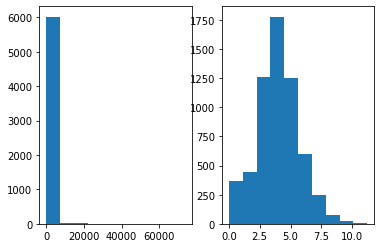

total_usd_recd


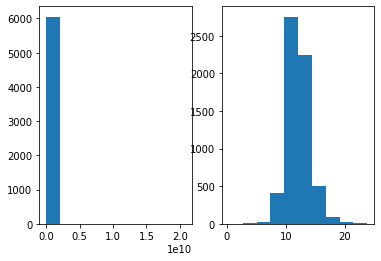

avg_usd_recd


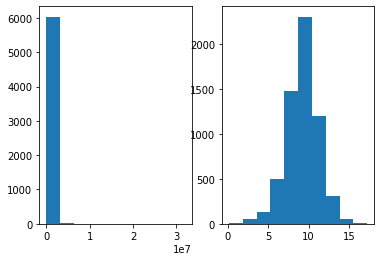

active_months


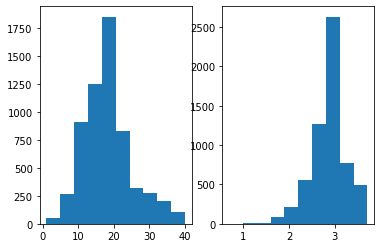

monthly_outgoing_txns


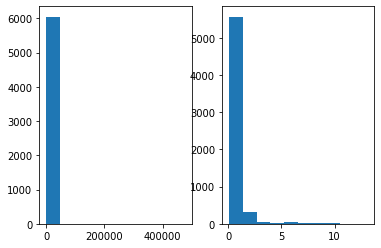

monthly_incoming_txns


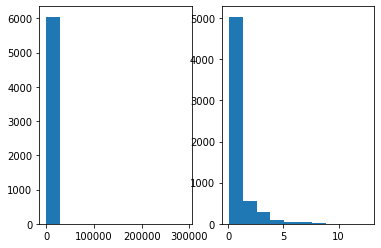

monthly_eth_sent


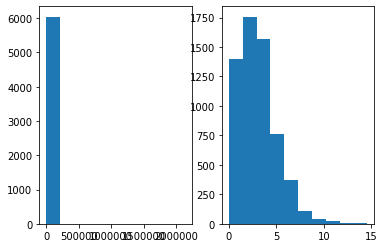

monthly_usd_sent


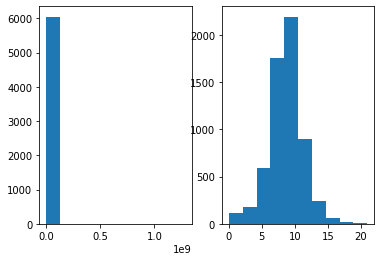

monthly_eth_recd


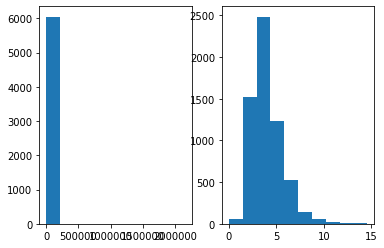

monthly_usd_recd


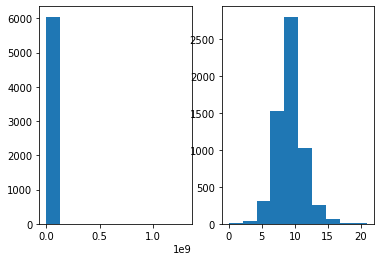

contracts_created


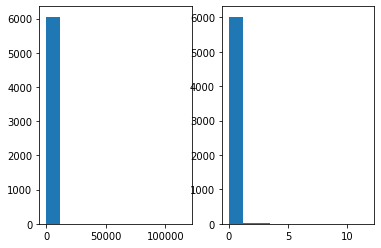

contract_txns_sent


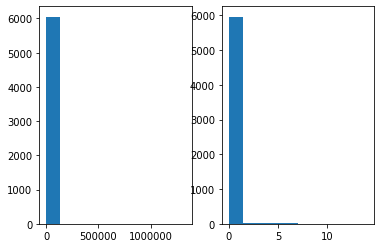

incoming_avg_time_btwn_txns


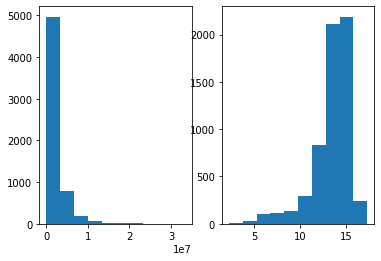

incoming_std_time_btwn_txns


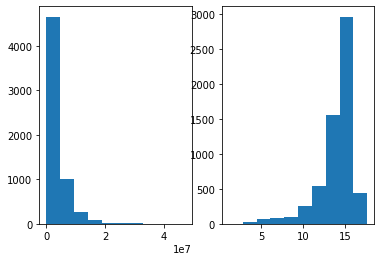

outgoing_avg_time_btwn_txns


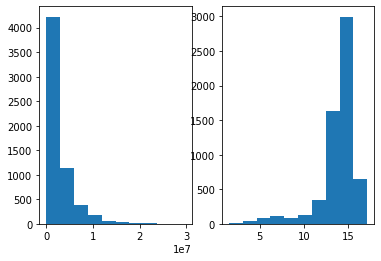

outgoing_std_time_btwn_txns


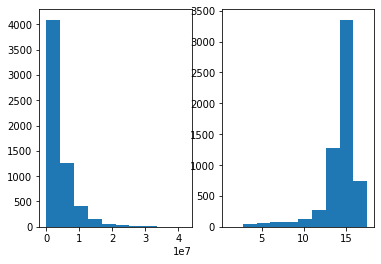

num_tokens_used


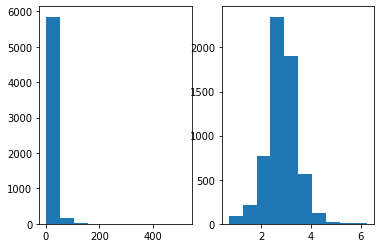

In [16]:
for feat in data.columns:
    print(feat)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(data[feat])
    ax2.hist(np.log1p(data[feat]))
    plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ether_balance                6057 non-null   float64
 1   unique_tokens                6057 non-null   int64  
 2   unique_transfers             6057 non-null   int64  
 3   mined_blocks                 6057 non-null   int64  
 4   outgoing_txns                6057 non-null   int64  
 5   incoming_txns                6057 non-null   int64  
 6   total_eth_sent               6057 non-null   float64
 7   avg_eth_sent                 6057 non-null   float64
 8   total_usd_sent               6057 non-null   float64
 9   avg_usd_sent                 6057 non-null   float64
 10  total_eth_recd               6057 non-null   float64
 11  avg_eth_recd                 6057 non-null   float64
 12  total_usd_recd               6057 non-null   float64
 13  avg_usd_recd      

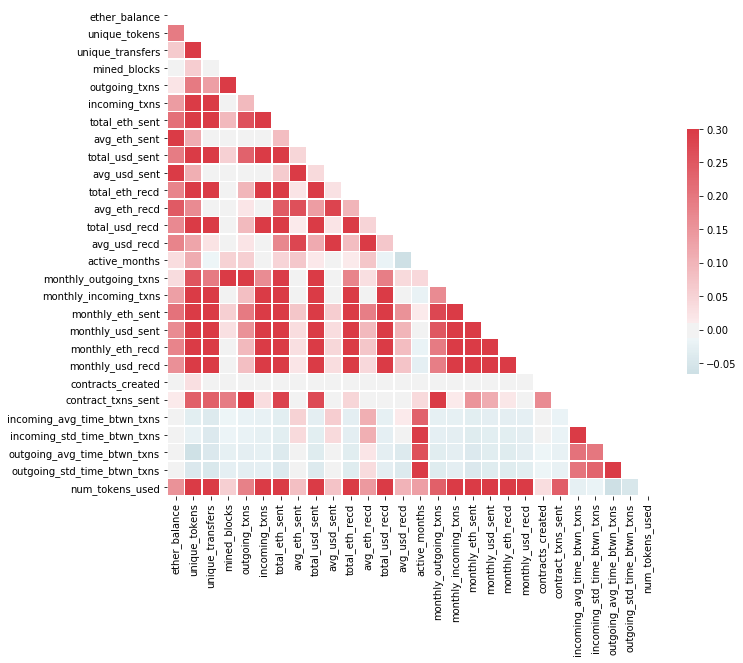

In [18]:
def plot_correlation_matrix(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=0.3,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
    )


plot_correlation_matrix(data)